<a href="https://colab.research.google.com/github/MahaSalehAlgh/Heart-Disease-ML-Project/blob/main/projectt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Dataset...

Dataset Shape: (303, 14)

First 5 Rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Data Preprocessing...

Dataset Shape After Cleaning: (297, 14)

Class Distribution:
target
0    160
1    137
Name: count, dtype: int64

Training Set Size: (237, 13)
Testing Set Size: (60, 13)

Applying Machine Learning Algorithms...

1️⃣ K-Nearest Neighbors (KNN)
--------------------------------

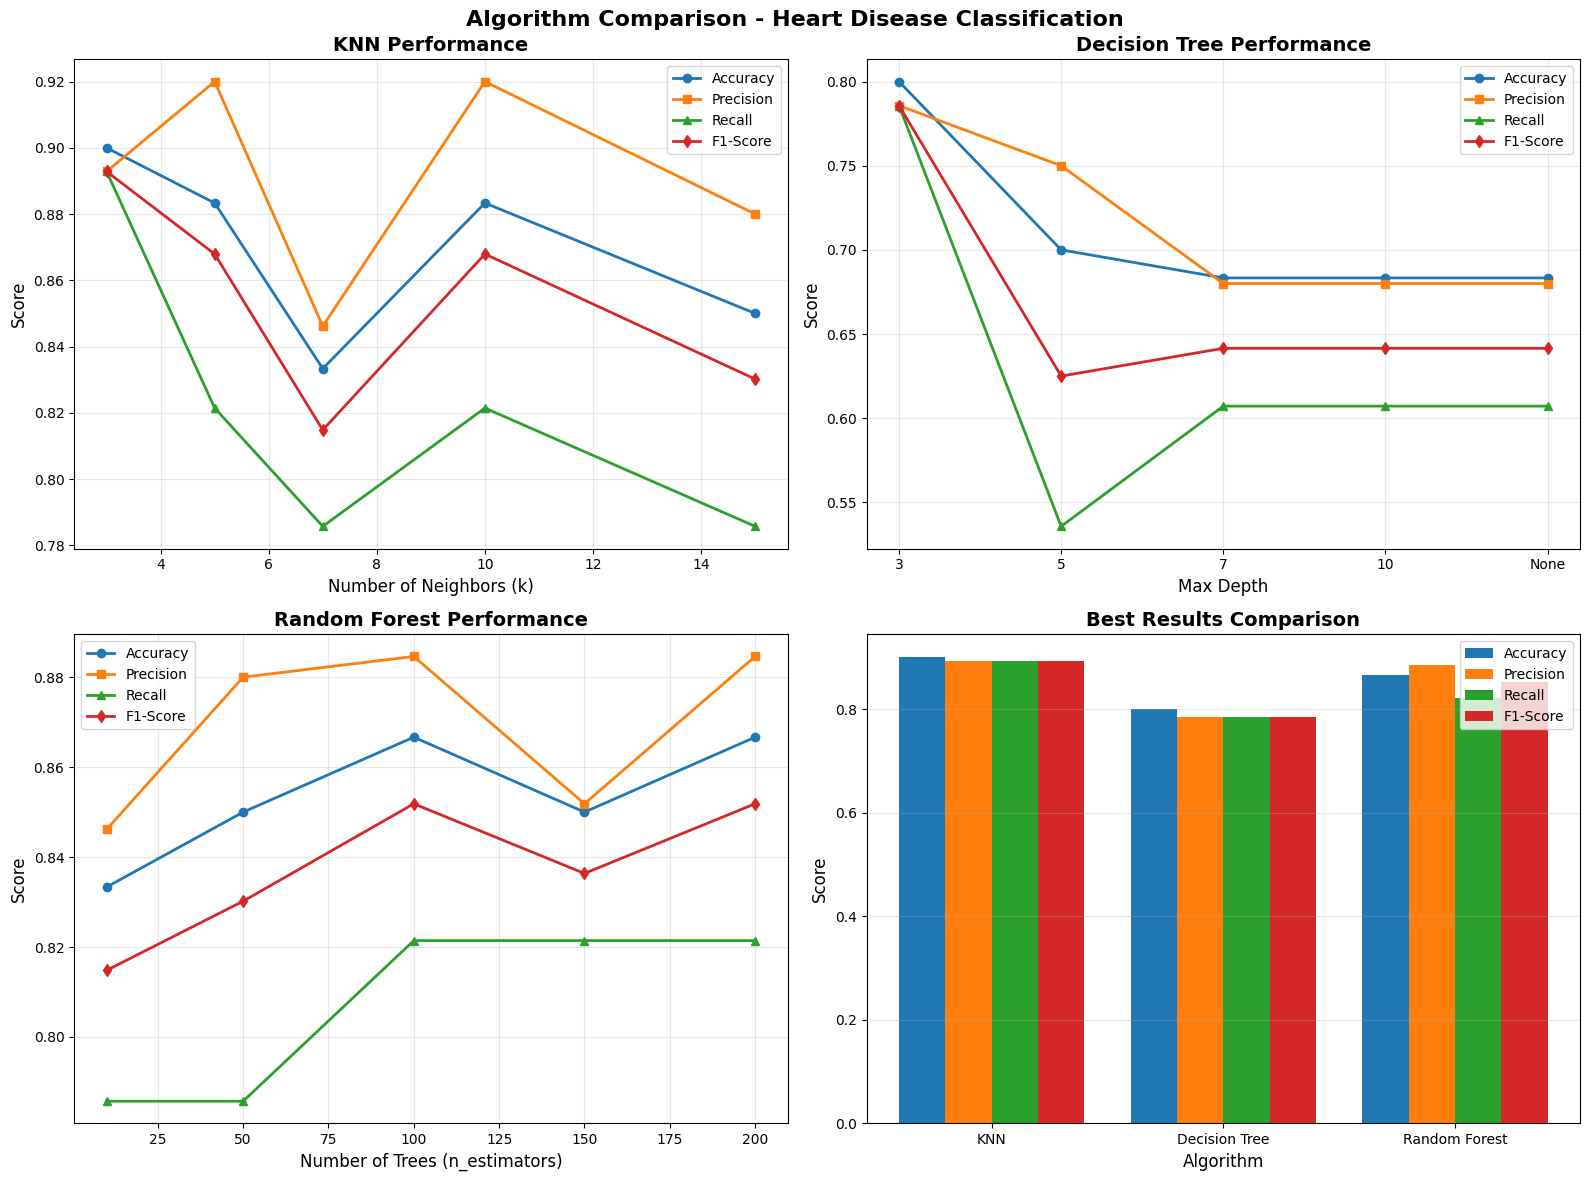


📊 FINAL RESULTS SUMMARY

🔹 Best Results for Each Algorithm:

1️⃣ KNN:
   Best k = 3.0
   Accuracy = 0.9000
   F1-Score = 0.8929

2️⃣ Decision Tree:
   Best max_depth = 3
   Accuracy = 0.8000
   F1-Score = 0.7857

3️⃣ Random Forest:
   Best n_estimators = 100.0
   Accuracy = 0.8667
   F1-Score = 0.8519

🏆 BEST OVERALL ALGORITHM: KNN
   Accuracy: 0.9000

Confusion Matrix - Best Model


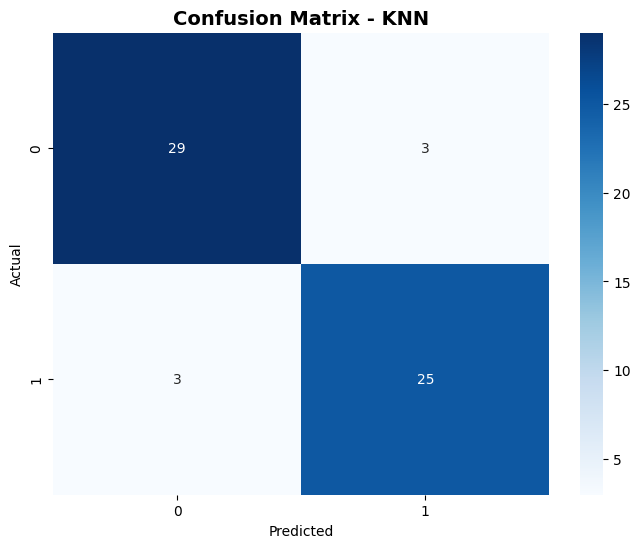


Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.91      0.91        32
     Disease       0.89      0.89      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60


✅ PROJECT COMPLETED SUCCESSFULLY!


In [ ]:
# Machine Learning Project - Heart Disease Classification
# Complete Implementation with Multiple Algorithms

# ========================================
# 1. Import Libraries
# ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
print("="*60)
print("Loading Dataset...")
print("="*60)

# Dataset URL from UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=columns, na_values='?')

print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 Rows:")
print(df.head())

# ========================================
# 2. Data Cleaning and Preprocessing
# ========================================
print("\n" + "="*60)
print("Data Preprocessing...")
print("="*60)

# Remove rows with missing values
df = df.dropna()

# Convert target to binary (0 = healthy, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(f"\nDataset Shape After Cleaning: {df.shape}")
print(f"\nClass Distribution:")
print(df['target'].value_counts())

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

# ========================================
# 3. Apply Algorithms with Different Parameters
# ========================================

# Dictionary to store results
results = {}

print("\n" + "="*60)
print("Applying Machine Learning Algorithms...")
print("="*60)

# -----------------
# KNN Algorithm
# -----------------
print("\n1️⃣ K-Nearest Neighbors (KNN)")
print("-" * 60)

knn_results = []
k_values = [3, 5, 7, 10, 15]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_results.append({
        'k': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    print(f"k={k}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

results['KNN'] = pd.DataFrame(knn_results)

# -----------------
# Decision Tree Algorithm
# -----------------
print("\n2️⃣ Decision Tree")
print("-" * 60)

dt_results = []
max_depths = [3, 5, 7, 10, None]

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    y_pred = dt.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dt_results.append({
        'max_depth': str(depth),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    print(f"max_depth={depth}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

results['Decision Tree'] = pd.DataFrame(dt_results)

# -----------------
# Random Forest Algorithm
# -----------------
print("\n3️⃣ Random Forest")
print("-" * 60)

rf_results = []
n_estimators_list = [10, 50, 100, 150, 200]

for n_est in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    rf_results.append({
        'n_estimators': n_est,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    print(f"n_estimators={n_est}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

results['Random Forest'] = pd.DataFrame(rf_results)

# ========================================
# 4. Visualization and Comparison
# ========================================

print("\n" + "="*60)
print("Generating Visualizations...")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Algorithm Comparison - Heart Disease Classification', fontsize=16, fontweight='bold')

# 1. KNN Results
ax1 = axes[0, 0]
knn_df = results['KNN']
ax1.plot(knn_df['k'], knn_df['Accuracy'], marker='o', label='Accuracy', linewidth=2)
ax1.plot(knn_df['k'], knn_df['Precision'], marker='s', label='Precision', linewidth=2)
ax1.plot(knn_df['k'], knn_df['Recall'], marker='^', label='Recall', linewidth=2)
ax1.plot(knn_df['k'], knn_df['F1-Score'], marker='d', label='F1-Score', linewidth=2)
ax1.set_xlabel('Number of Neighbors (k)', fontsize=12)
ax1.set_ylabel('Score', fontsize=12)
ax1.set_title('KNN Performance', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Decision Tree Results
ax2 = axes[0, 1]
dt_df = results['Decision Tree']
x_pos = np.arange(len(dt_df))
ax2.plot(x_pos, dt_df['Accuracy'], marker='o', label='Accuracy', linewidth=2)
ax2.plot(x_pos, dt_df['Precision'], marker='s', label='Precision', linewidth=2)
ax2.plot(x_pos, dt_df['Recall'], marker='^', label='Recall', linewidth=2)
ax2.plot(x_pos, dt_df['F1-Score'], marker='d', label='F1-Score', linewidth=2)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(dt_df['max_depth'])
ax2.set_xlabel('Max Depth', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Decision Tree Performance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Random Forest Results
ax3 = axes[1, 0]
rf_df = results['Random Forest']
ax3.plot(rf_df['n_estimators'], rf_df['Accuracy'], marker='o', label='Accuracy', linewidth=2)
ax3.plot(rf_df['n_estimators'], rf_df['Precision'], marker='s', label='Precision', linewidth=2)
ax3.plot(rf_df['n_estimators'], rf_df['Recall'], marker='^', label='Recall', linewidth=2)
ax3.plot(rf_df['n_estimators'], rf_df['F1-Score'], marker='d', label='F1-Score', linewidth=2)
ax3.set_xlabel('Number of Trees (n_estimators)', fontsize=12)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Random Forest Performance', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Overall Comparison (Best results from each algorithm)
ax4 = axes[1, 1]
best_results = {
    'KNN': results['KNN'].loc[results['KNN']['Accuracy'].idxmax()],
    'Decision Tree': results['Decision Tree'].loc[results['Decision Tree']['Accuracy'].idxmax()],
    'Random Forest': results['Random Forest'].loc[results['Random Forest']['Accuracy'].idxmax()]
}

algorithms = list(best_results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(algorithms))
width = 0.2

for i, metric in enumerate(metrics):
    values = [best_results[alg][metric] for alg in algorithms]
    ax4.bar(x + i*width, values, width, label=metric)

ax4.set_xlabel('Algorithm', fontsize=12)
ax4.set_ylabel('Score', fontsize=12)
ax4.set_title('Best Results Comparison', fontsize=14, fontweight='bold')
ax4.set_xticks(x + width * 1.5)
ax4.set_xticklabels(algorithms)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ========================================
# 5. Final Results Summary
# ========================================

print("\n" + "="*60)
print("📊 FINAL RESULTS SUMMARY")
print("="*60)

print("\n🔹 Best Results for Each Algorithm:")
print("\n1️⃣ KNN:")
best_knn = results['KNN'].loc[results['KNN']['Accuracy'].idxmax()]
print(f"   Best k = {best_knn['k']}")
print(f"   Accuracy = {best_knn['Accuracy']:.4f}")
print(f"   F1-Score = {best_knn['F1-Score']:.4f}")

print("\n2️⃣ Decision Tree:")
best_dt = results['Decision Tree'].loc[results['Decision Tree']['Accuracy'].idxmax()]
print(f"   Best max_depth = {best_dt['max_depth']}")
print(f"   Accuracy = {best_dt['Accuracy']:.4f}")
print(f"   F1-Score = {best_dt['F1-Score']:.4f}")

print("\n3️⃣ Random Forest:")
best_rf = results['Random Forest'].loc[results['Random Forest']['Accuracy'].idxmax()]
print(f"   Best n_estimators = {best_rf['n_estimators']}")
print(f"   Accuracy = {best_rf['Accuracy']:.4f}")
print(f"   F1-Score = {best_rf['F1-Score']:.4f}")

# Determine overall best algorithm
best_overall = max(best_results.items(), key=lambda x: x[1]['Accuracy'])
print(f"\n🏆 BEST OVERALL ALGORITHM: {best_overall[0]}")
print(f"   Accuracy: {best_overall[1]['Accuracy']:.4f}")

# Confusion Matrix for best model
print("\n" + "="*60)
print("Confusion Matrix - Best Model")
print("="*60)

if best_overall[0] == 'KNN':
    best_model = KNeighborsClassifier(n_neighbors=int(best_knn['k']))
elif best_overall[0] == 'Decision Tree':
    depth = None if best_dt['max_depth'] == 'None' else int(best_dt['max_depth'])
    best_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
else:
    best_model = RandomForestClassifier(n_estimators=int(best_rf['n_estimators']), random_state=42)

best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(f'Confusion Matrix - {best_overall[0]}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Healthy', 'Disease']))

print("\n" + "="*60)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)